##  **Travel Aggregator Analysis**  

---
**Certification Project**


 Scenario





Travelling has significantly changed thanks to technology. In the earlier days, it was not
easy to travel as booking journeys used to be a hassle, where people needed to contact
travel agents, get prices and then do a lot of paperwork.
But, with the advent of online apps, it becomes easier to book tickets. However, one
challenge is still there. Due to many available apps which offer bookings, there can be a lot
of comparisons for getting the best price.
A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top
platforms (Yatra, MMT, Goibibo). It helps the user compare prices for their upcoming
journeys on its platform and the customer is redirected to the desired platform after
looking at the price.
However, they need to do a lot of analysis of the data which they have collected over a
while.
As a newly hired analyst and proficiency in Python, your role is to help them perform an indepth analysis.

**Objective: Please provide answers to the following questions:**

1) Find the number of distinct bookings, sessions, and searches from the given data
sets.

2) How many sessions have more than one booking?

3) Which days of the week have the highest number of bookings? Also, draw a pie
chart to show the distribution for all days of the week?

4) For each of the service names, display the total number of bookings and the total
Gross Booking Value in INR.

5) For customers who have more than 1 booking, which is the most booked route
(from_city to to_city)?

6) Which are the top 3 departure cities from where customers book mostly in advance,
provided that there have been at least 5 departures from that city?

7) Plot a heatmap displaying correlations of the numerical column and report which
pair of numerical columns in the bookings data set, have the maximum correlation?

8) For each service, which is the most used device type for making bookings on the
platform?

9) Plot the trends at a quarterly frequency for the number of bookings by each of the
device types, that is, plot a time series for each year and quarter showing the
number of bookings performed by each device type.

10) Consider the following example:12 customers performed a total of 100 searches but only a few of them performed
10 bookings in total.
Searches = 100 bookings = 10 customers = 12
The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
information/context, answer the following:

• What is the average oBSR for each month of the year?

• What is the average oBSR for each day of the week?

• Plot a time series of oBSR on all the given dates.
About the Data: The data provided consists of the following two files:

1) Bookings.csv

• customer_id

• booking_id

• from_city

• from_country

• to_city

• to_country

• booking_time

• device_type_used

• INR_Amount

• service_name

• no_of_passengers

• days_to_departure

• distance_km


2) Sessions.csv

• session_id

• search_id

• search_time

• session_starting_time

• booking_id

#            `SOLUTION`
To perform the in-depth analysis for "MyNextBooking," we'll need to approach the data systematically.

**1. Find the number of distinct bookings, sessions, and searches**

To get distinct counts, we first need to read the data from the CSV files and then perform the necessary operations:

In [86]:
import pandas as pd

# Load datasets
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

# Number of distinct entries
distinct_bookings = bookings['booking_id'].nunique()
distinct_sessions = sessions['session_id'].nunique()
distinct_searches = sessions['search_id'].nunique()

#distinct_bookings, distinct_sessions, distinct_searches

print(f"Distinct Bookings: {distinct_bookings}")
print(f"Distinct Sessions: {distinct_sessions}")
print(f"Distinct Searches: {distinct_searches}")

Distinct Bookings: 339
Distinct Sessions: 331
Distinct Searches: 1360


**2. How many sessions have more than one booking?**

In [87]:
# Group by session_id and count unique booking_ids in each session
session_booking_count = sessions.groupby('session_id')['booking_id'].nunique()

# Find how many sessions have more than one booking
sessions_with_more_than_one_booking = session_booking_count[session_booking_count > 1].count()

# Output the result
print(f"Sessions with more than one booking: {sessions_with_more_than_one_booking}")


Sessions with more than one booking: 10


**3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week.**

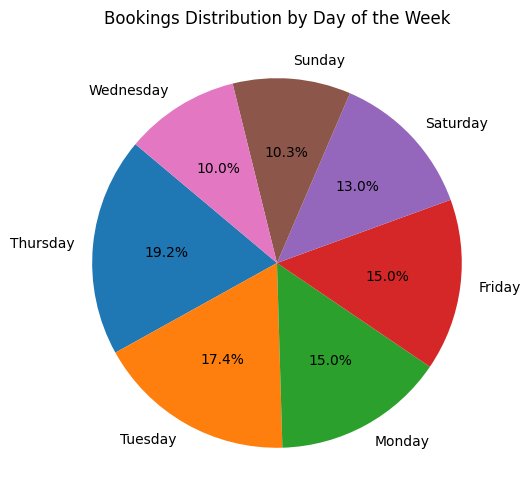

,count
day_of_week,
Thursday,65
Tuesday,59
Monday,51
Friday,51
Saturday,44
Sunday,35
Wednesday,34


In [88]:
import matplotlib.pyplot as plt

# Convert booking_time to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Extract day of the week
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()

# Count bookings by day of the week
day_of_week_counts = bookings['day_of_week'].value_counts()

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(day_of_week_counts, labels=day_of_week_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Bookings Distribution by Day of the Week')
plt.show()

day_of_week_counts



**4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.**

In [89]:
# Group by service_name and calculate totals
service_summary = bookings.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),
    total_gross_booking_value=('INR_Amount', 'sum')
).reset_index()

service_summary


,service_name,total_bookings,total_gross_booking_value
0,GOIBIBO,186,5897637.97
1,MMT,48,665669.08
2,YATRA,105,3378702.13


**5. For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?**

In [90]:
# Get customers with more than 1 booking
customer_bookings = bookings.groupby('customer_id').filter(lambda x: len(x) > 1)

# Find most booked route
most_booked_route = customer_bookings.groupby(['from_city', 'to_city']).size().reset_index(name='counts')
most_booked_route = most_booked_route.sort_values(by='counts', ascending=False).iloc[0]

most_booked_route


,26
from_city,Gurgaon
to_city,Roissy-en-France
counts,5


**6. Top 3 departure cities from where customers book mostly in advance, with at least 5 departures**

In [91]:
# Filter cities with at least 5 departures
departure_city_counts = bookings.groupby('from_city').filter(lambda x: len(x) >= 5)
average_days_to_departure = departure_city_counts.groupby('from_city')['days_to_departure'].mean().reset_index()
top_departure_cities = average_days_to_departure.sort_values(by='days_to_departure', ascending=False).head(3)

top_departure_cities


,from_city,days_to_departure
1,Bālāpur,46.166667
4,Devanhalli,29.583333
2,Chennai,26.187500


**7. Plot a heatmap displaying correlations of numerical columns and report the pair with the maximum correlation**

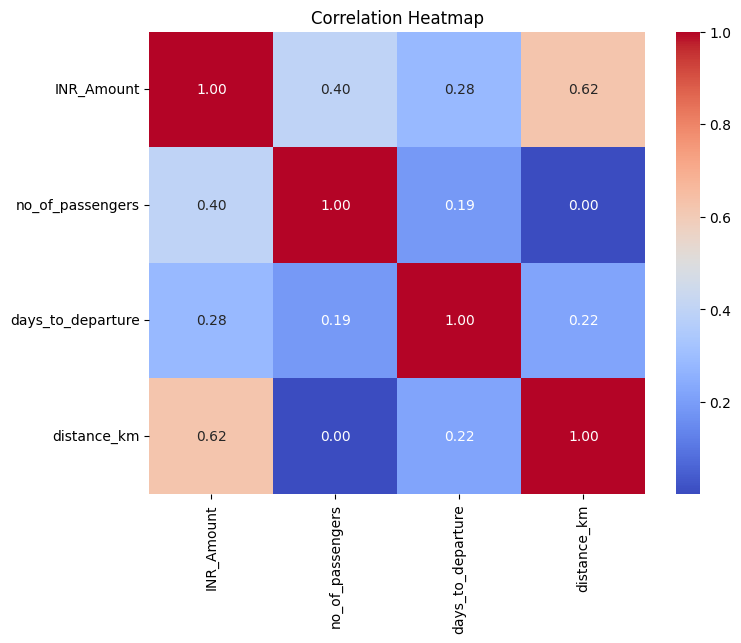

Max correlation pair: 0.6235653096997817


In [92]:
import seaborn as sns

# Correlation matrix
correlation_matrix = bookings[['INR_Amount', 'no_of_passengers', 'days_to_departure', 'distance_km']].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Maximum correlation pair

max_corr_pair = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates().iloc[1]
print(f"Max correlation pair: {max_corr_pair}")


**8. For each service, which is the most used device type for making bookings on the platform?**

In [93]:
# Most used device type by service
most_used_device = bookings.groupby('service_name')['device_type_used'].agg(lambda x: x.mode().iloc[0]).reset_index()

most_used_device


,service_name,device_type_used
0,GOIBIBO,IOS
1,MMT,Desktop
2,YATRA,Desktop


**9. Plot trends at a quarterly frequency for the number of bookings by each device t**ype

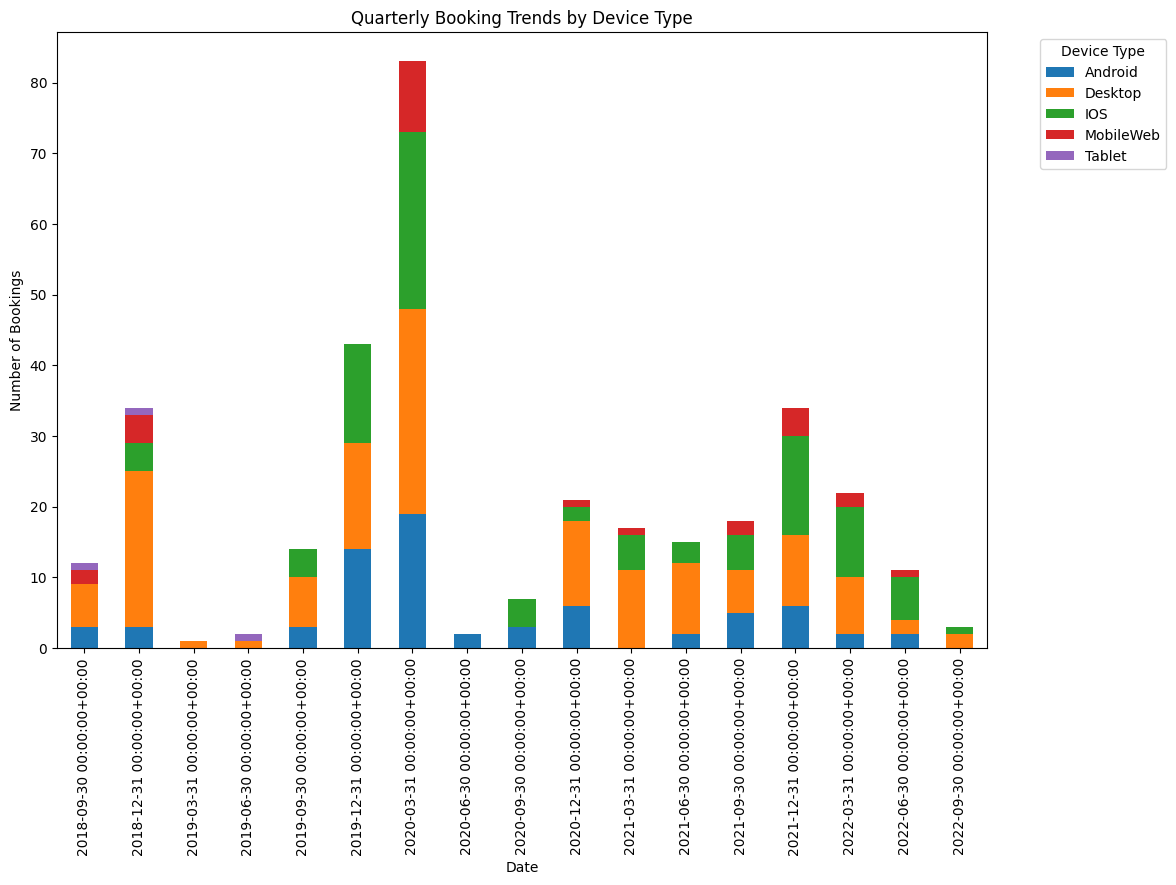

In [94]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure bookings_df is already loaded and 'booking_time' is in datetime format
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])

# Set the 'booking_time' as the DataFrame index for resampling
bookings.set_index('booking_time', inplace=True)

# Group by device type and resample quarterly, counting the number of bookings per quarter
quarterly_bookings = bookings.groupby('device_type_used').resample('Q')['booking_id'].count().unstack(level=0)

# Plot a bar plot for quarterly booking trends by device type
quarterly_bookings.plot(kind='bar', stacked=True, figsize=(12, 8), title='Quarterly Booking Trends by Device Type')

plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**10. Calculate and plot the overall booking to search ratio (oBSR) for each month and day of the week
First, calculate oBSR:**

<ipython-input-95-0bdf77c8a27f>:16: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings['year_month'] = bookings['booking_time'].dt.to_period('M')
<ipython-input-95-0bdf77c8a27f>:17: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  sessions['year_month'] = sessions['search_time'].dt.to_period('M')


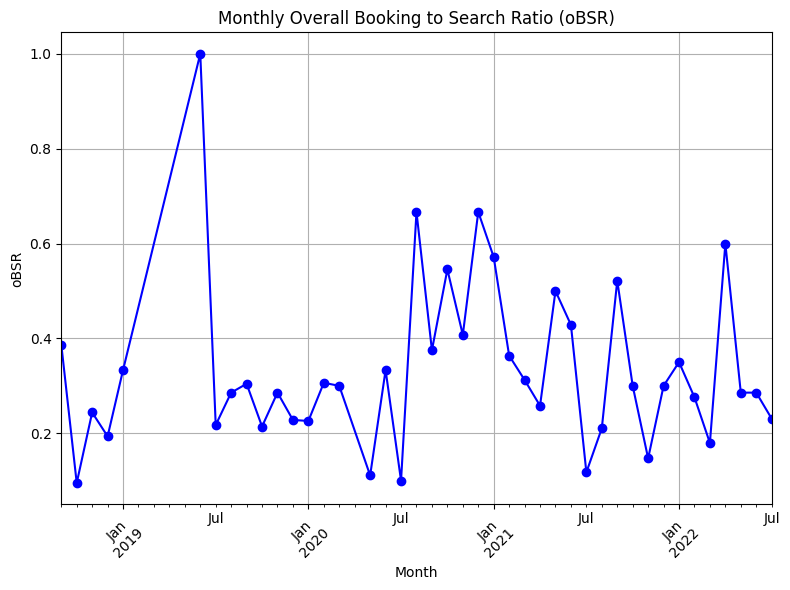

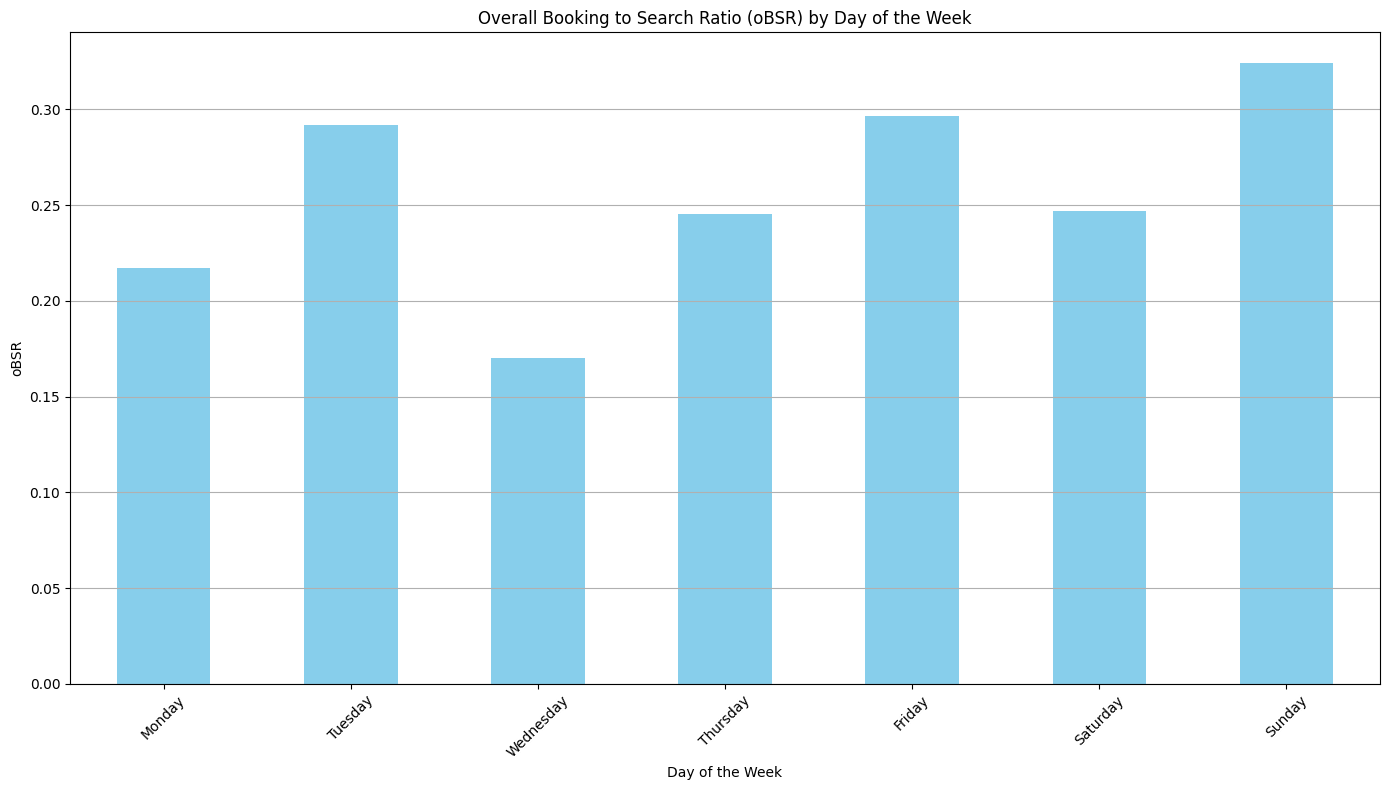

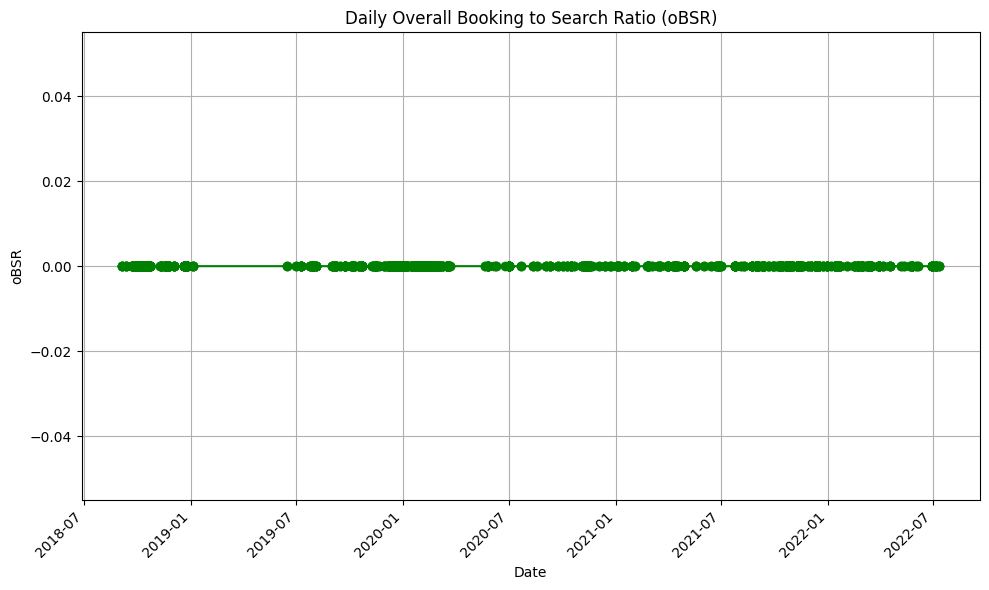

In [95]:
#import pandas as pd
#import matplotlib.pyplot as plt

# Load datasets
bookings = pd.read_csv('Bookings.csv')
sessions = pd.read_csv('Sessions.csv')

# Convert date columns to datetime
bookings['booking_time'] = pd.to_datetime(bookings['booking_time'])
sessions['search_time'] = pd.to_datetime(sessions['search_time'],format='ISO8601') # Use the ISO8601 format to handle the "Z" at the end)

# Merge datasets to align bookings with searches
merged_data = pd.merge(bookings, sessions[['session_id', 'search_id', 'booking_id']], on='booking_id', how='left')

# Extract Year-Month and Day of Week
bookings['year_month'] = bookings['booking_time'].dt.to_period('M')
sessions['year_month'] = sessions['search_time'].dt.to_period('M')
bookings['day_of_week'] = bookings['booking_time'].dt.day_name()
sessions['day_of_week'] = sessions['search_time'].dt.day_name()

# Calculate oBSR by Month
monthly_bookings = bookings.groupby('year_month')['booking_id'].nunique()
monthly_searches = sessions.groupby('year_month')['search_id'].nunique()
monthly_stats = pd.DataFrame({
    'bookings': monthly_bookings,
    'searches': monthly_searches
}).fillna(0)
monthly_stats['oBSR'] = monthly_stats['bookings'] / monthly_stats['searches']

# Calculate oBSR by Day of the Week
daily_bookings = bookings.groupby('day_of_week')['booking_id'].nunique()
daily_searches = sessions.groupby('day_of_week')['search_id'].nunique()
daily_stats = pd.DataFrame({
    'bookings': daily_bookings,
    'searches': daily_searches
}).fillna(0)
daily_stats['oBSR'] = daily_stats['bookings'] / daily_stats['searches']

# Plot oBSR by Month
plt.figure(figsize=(8, 6))
monthly_stats['oBSR'].plot(kind='line', marker='o', color='blue')
plt.title('Monthly Overall Booking to Search Ratio (oBSR)')
plt.xlabel('Month')
plt.ylabel('oBSR')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot oBSR by Day of the Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_stats = daily_stats.reindex(day_order)

plt.figure(figsize=(14, 8))
daily_stats['oBSR'].plot(kind='bar', color='skyblue')
plt.title('Overall Booking to Search Ratio (oBSR) by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('oBSR')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot oBSR over Time
bookings_daily = bookings.groupby('booking_time').size()
searches_daily = sessions.groupby('search_time').size()
oBSR_daily = bookings_daily / searches_daily
oBSR_daily = oBSR_daily.fillna(0)

plt.figure(figsize=(10, 6))
oBSR_daily.plot(kind='line', marker='o', color='green')
plt.title('Daily Overall Booking to Search Ratio (oBSR)')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
